# Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Importación de datos

In [ ]:
#Por favor cambiar esta ruta por aquella en la que se encuentre almacenado el archivo de extensión .csv
df_training = pd.read_csv('C:/Users/juanj/Universidad de Antioquia/Monografia[] - General/Predicción de Diabetes Nov 2022/train_data.csv', sep=',')
df_training.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Nuestra variable de respuesta es la columna diabetes. En esta, el 0 representa que un paciente NO padece diabetes, y el 1 representa que un paciente SÍ padece diabetes.

In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   80692 non-null  float64
 1   Sex                   80692 non-null  float64
 2   HighChol              80692 non-null  float64
 3   CholCheck             80692 non-null  float64
 4   BMI                   80692 non-null  float64
 5   Smoker                80692 non-null  float64
 6   HeartDiseaseorAttack  80692 non-null  float64
 7   PhysActivity          80692 non-null  float64
 8   Fruits                80692 non-null  float64
 9   Veggies               80692 non-null  float64
 10  HvyAlcoholConsump     80692 non-null  float64
 11  GenHlth               80692 non-null  float64
 12  MentHlth              80692 non-null  float64
 13  PhysHlth              80692 non-null  float64
 14  DiffWalk              80692 non-null  float64
 15  Diabetes           

In [ ]:
df_training.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

Como puede apreciarse, no hay presencia de datos nulos

In [ ]:
df_training.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80692.0,8.571841,2.852525,1.0,7.0,9.0,11.0,13.0
Sex,80692.0,0.481919,0.499676,0.0,0.0,0.0,1.0,1.0
HighChol,80692.0,0.518750,0.499651,0.0,0.0,1.0,1.0,1.0
CholCheck,80692.0,0.969687,0.171448,0.0,1.0,1.0,1.0,1.0
BMI,80692.0,29.897747,7.365230,12.0,25.0,29.0,33.0,98.0
Smoker,80692.0,0.494894,0.499977,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,80692.0,0.141823,0.348871,0.0,0.0,0.0,0.0,1.0
PhysActivity,80692.0,0.680861,0.466146,0.0,0.0,1.0,1.0,1.0
Fruits,80692.0,0.588757,0.492062,0.0,0.0,1.0,1.0,1.0
Veggies,80692.0,0.777735,0.415771,0.0,1.0,1.0,1.0,1.0


# Distribución de la variable de respuesta

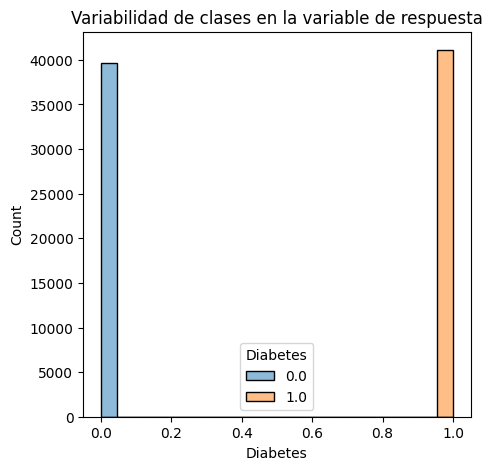

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=df_training, x = 'Diabetes', hue='Diabetes' )
plt.title('Variabilidad de clases en la variable de respuesta')
plt.show()

Como puede apreciarse en la imagen, las clases de la variable de respuesta se encuentran balanceadas dentro del dataset

### Distribución de las características del dataset de entrenamiento

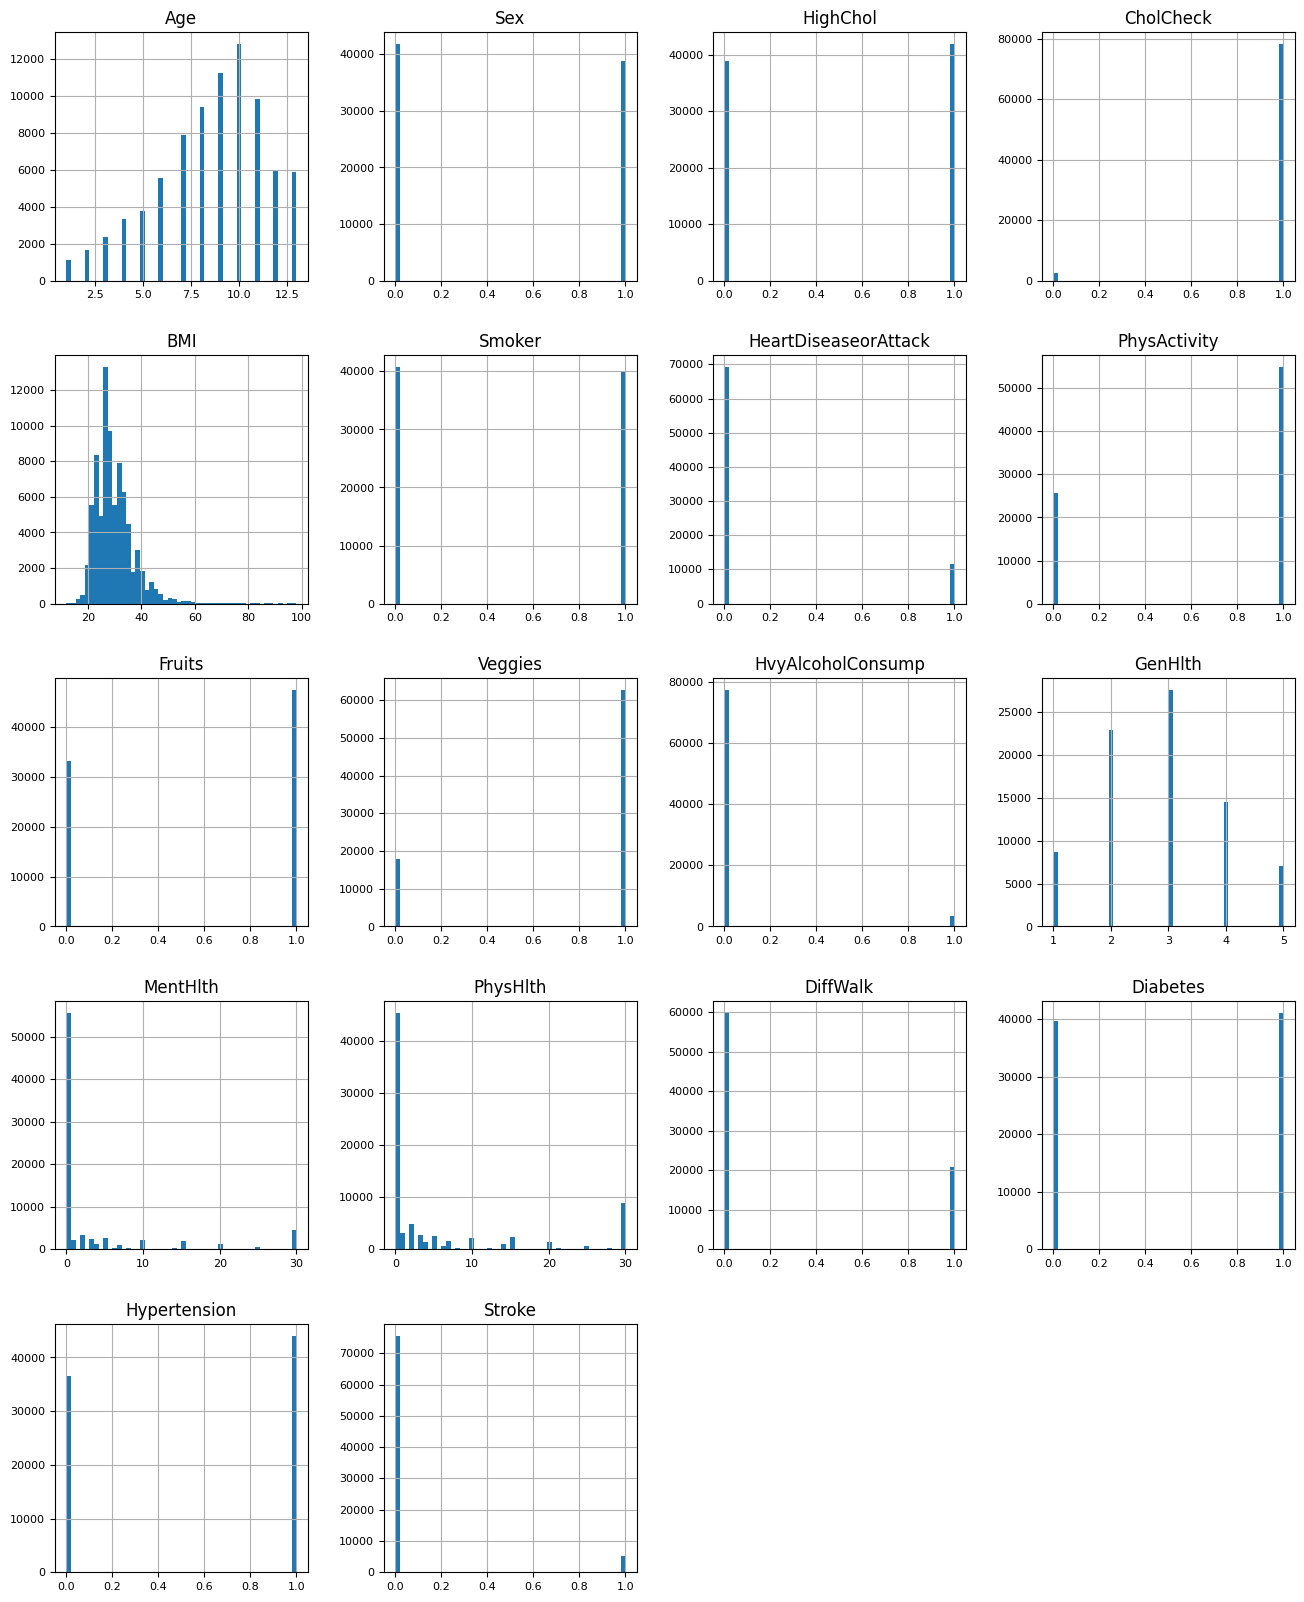

In [ ]:
df_training.hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.show()

Como puede apreciarse en la anterior imagen, la gran mayoría de las características del dataset son de tipo categóricas, ya que solamente poseen un número limitado de valores que pueden tomar. Por lo tanto, procedemos a hacer una separación de las variables que son numéricas con respecto a las que son categóricas

In [ ]:
numericas = ['BMI']
categoricas = ['Age','Sex','HighChol','CholCheck','Smoker','HeartDiseaseorAttack','PhysActivity',
               'Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk',
               'Diabetes','Hypertension','Stroke']

In [ ]:
df_training[numericas].head(5)

,BMI
0,26.0
1,26.0
2,26.0
3,28.0
4,29.0


In [ ]:
df_training[categoricas].head(5)

,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


De acuerdo con la clasificación dada a las variables, tenemos 17 de tipo categórica y solamente 1 de tipo numérica

Inicialmente, graficaremos un diagrama de caja y bigotes para observar la distribución de la variable numérica dentro de la base de datos

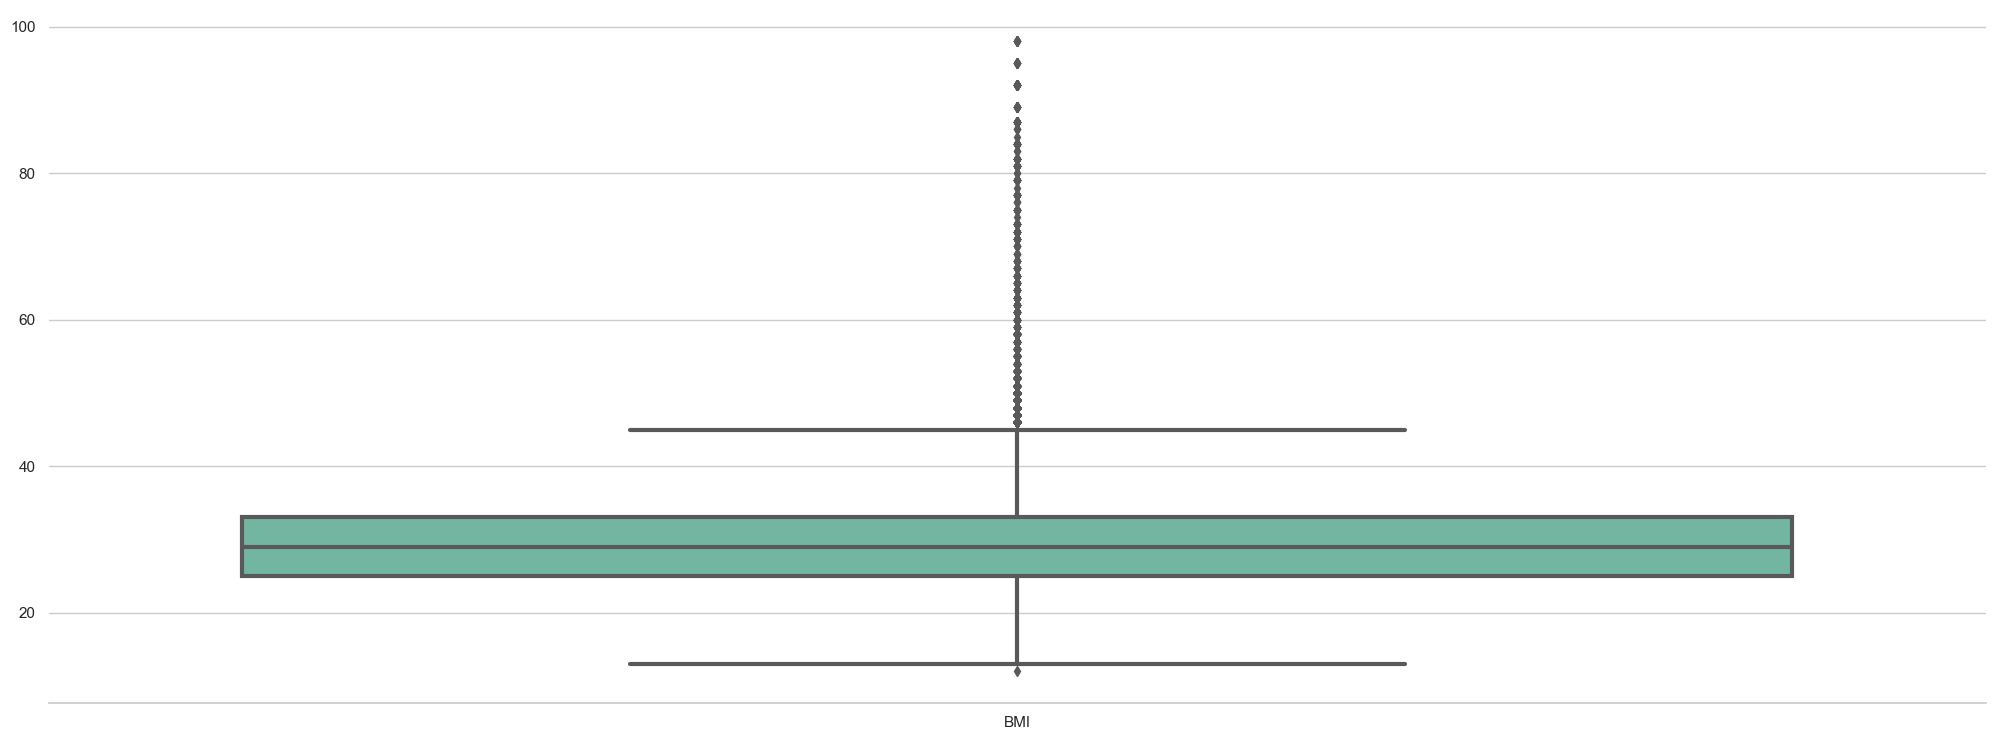

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = df_training[numericas], linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

Es claro que uno de los factores que influye en la aparición de diabetes , es la obesidad y el BMI mide o da cuenta de ese factor. Por esta razón, no se debe pensar en que los datos por encima del último cuartil del anterior gráfico, son outliers. En problemas médicos, es necesario tener en cuenta el criterio clínico también.

Procedemos a graficar una matriz de correlación para evaluar cuál es la interacción que existe entre cada par de variables que componen el dataset

In [ ]:
df_training_corr = df_training.copy().drop('Diabetes', axis=1)
df_training_corr.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


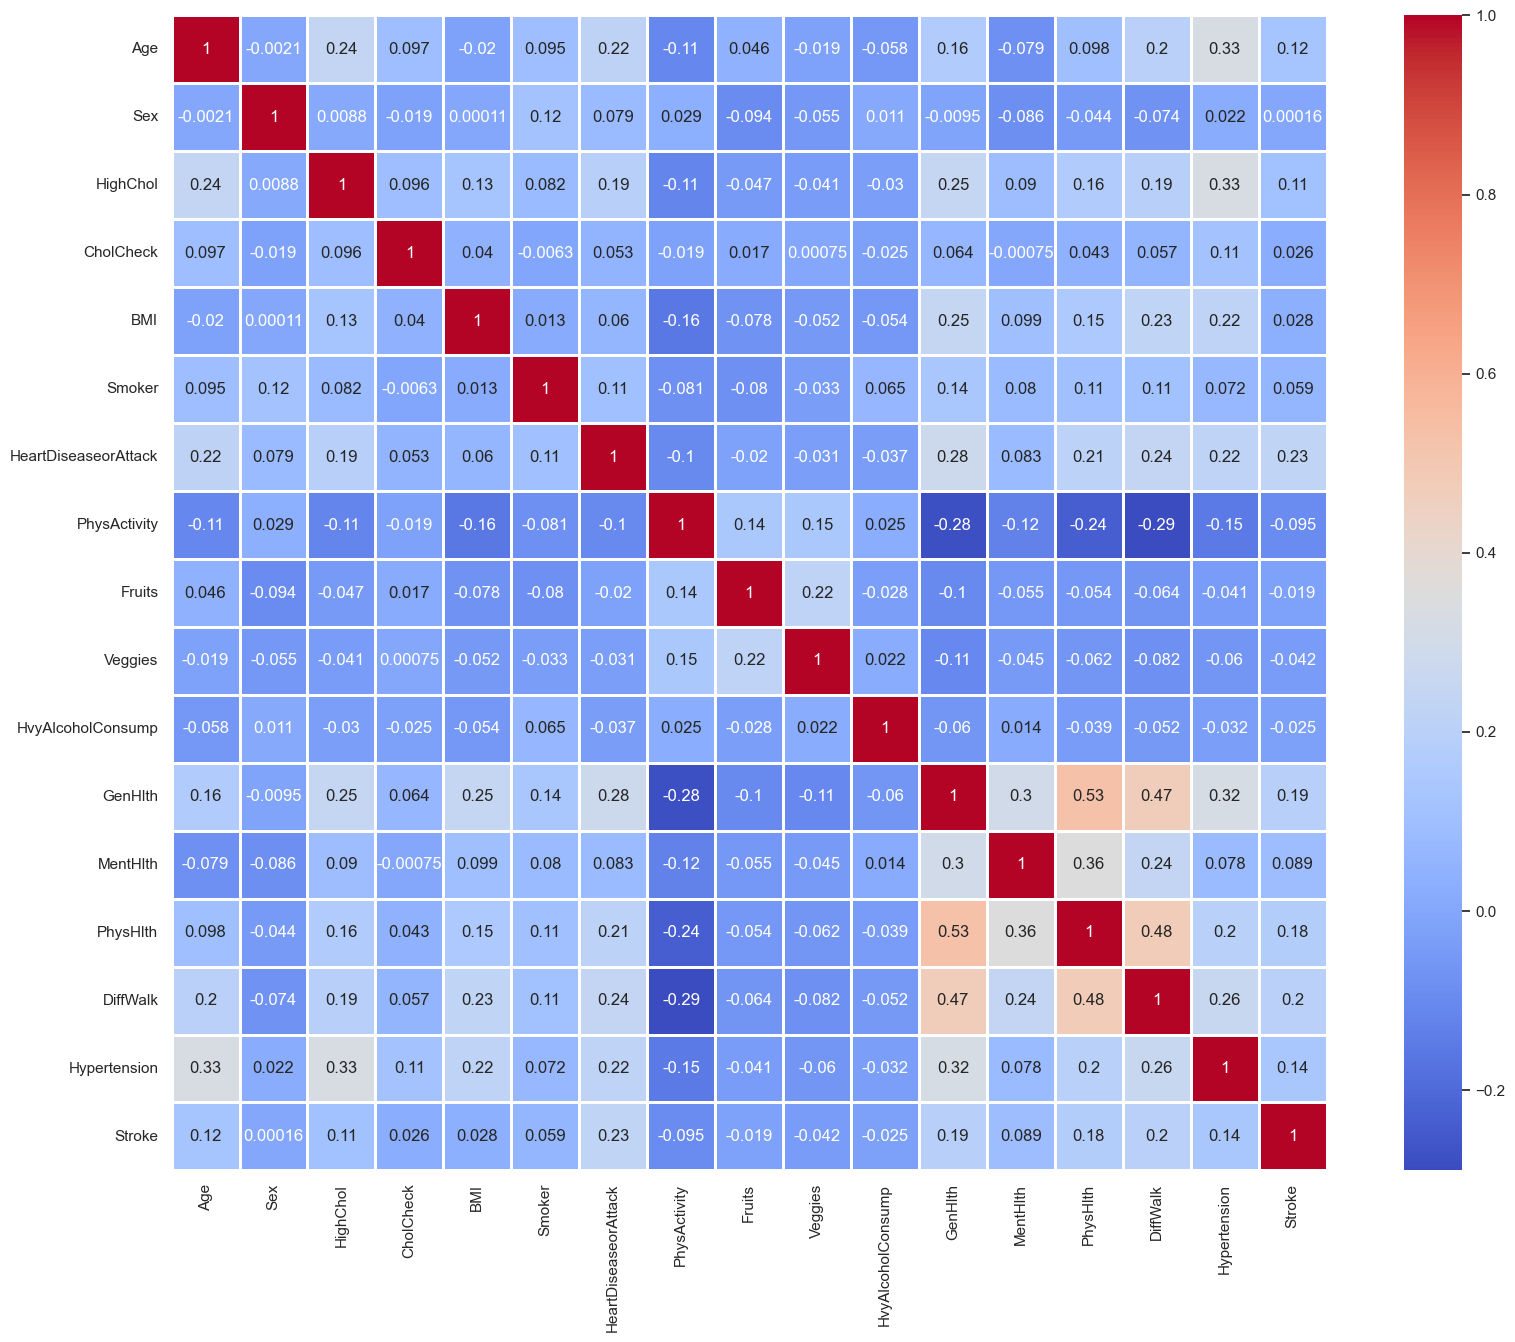

In [ ]:
plt.figure(figsize=(20,15))
fig = sns.heatmap(df_training_corr.corr(), annot=True, linewidths=0.9, square=True, cmap='coolwarm')
plt.show()

Como puede apreciarse, no existen correlaciones fuertes entre variables, ya que, excluyendo la diagonal principal, no hay valores dentro de la matriz que sean cercanos a la unidad.

# Ejecución del one-hot encoding

In [ ]:
df_training[categoricas] = df_training[categoricas].astype('category')

In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   80692 non-null  category
 1   Sex                   80692 non-null  category
 2   HighChol              80692 non-null  category
 3   CholCheck             80692 non-null  category
 4   BMI                   80692 non-null  float64 
 5   Smoker                80692 non-null  category
 6   HeartDiseaseorAttack  80692 non-null  category
 7   PhysActivity          80692 non-null  category
 8   Fruits                80692 non-null  category
 9   Veggies               80692 non-null  category
 10  HvyAlcoholConsump     80692 non-null  category
 11  GenHlth               80692 non-null  category
 12  MentHlth              80692 non-null  category
 13  PhysHlth              80692 non-null  category
 14  DiffWalk              80692 non-null  category
 15  Di

In [ ]:
variables_para_dummies = ['Sex','HighChol','CholCheck','Smoker','HeartDiseaseorAttack',
                          'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','DiffWalk',
                          'Hypertension','Stroke']

In [ ]:
df_encoded = pd.get_dummies(df_training, columns=variables_para_dummies, drop_first=True).astype(float)
df_encoded.head(5)

,Age,BMI,GenHlth,MentHlth,PhysHlth,Diabetes,Sex_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,DiffWalk_1.0,Hypertension_1.0,Stroke_1.0
0,4.0,26.0,3.0,5.0,30.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,12.0,26.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,13.0,26.0,1.0,0.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11.0,28.0,3.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,8.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.shape

(80692, 18)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80692 non-null  float64
 1   BMI                       80692 non-null  float64
 2   GenHlth                   80692 non-null  float64
 3   MentHlth                  80692 non-null  float64
 4   PhysHlth                  80692 non-null  float64
 5   Diabetes                  80692 non-null  float64
 6   Sex_1.0                   80692 non-null  float64
 7   HighChol_1.0              80692 non-null  float64
 8   CholCheck_1.0             80692 non-null  float64
 9   Smoker_1.0                80692 non-null  float64
 10  HeartDiseaseorAttack_1.0  80692 non-null  float64
 11  PhysActivity_1.0          80692 non-null  float64
 12  Fruits_1.0                80692 non-null  float64
 13  Veggies_1.0               80692 non-null  float64
 14  HvyAlc

# Partición de los conjuntos de datos en entrenamiento y pruebas

## Escalamiento min max de las características del set de datos

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

In [ ]:
df_scaled.head(5)

,Age,BMI,GenHlth,MentHlth,PhysHlth,Diabetes,Sex_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,DiffWalk_1.0,Hypertension_1.0,Stroke_1.0
0,0.250000,0.162791,0.50,0.166667,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.916667,0.162791,0.50,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.000000,0.162791,0.00,0.000000,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.833333,0.186047,0.50,0.000000,0.100000,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.583333,0.197674,0.25,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80692.0,0.630987,0.237710,0.0,0.500000,0.666667,0.833333,1.0
BMI,80692.0,0.208113,0.085642,0.0,0.151163,0.197674,0.244186,1.0
GenHlth,80692.0,0.463646,0.276513,0.0,0.250000,0.500000,0.750000,1.0
MentHlth,80692.0,0.120632,0.266520,0.0,0.000000,0.000000,0.066667,1.0
PhysHlth,80692.0,0.193592,0.334206,0.0,0.000000,0.000000,0.200000,1.0
Diabetes,80692.0,0.509319,0.499916,0.0,0.000000,1.000000,1.000000,1.0
Sex_1.0,80692.0,0.481919,0.499676,0.0,0.000000,0.000000,1.000000,1.0
HighChol_1.0,80692.0,0.518750,0.499651,0.0,0.000000,1.000000,1.000000,1.0
CholCheck_1.0,80692.0,0.969687,0.171448,0.0,1.000000,1.000000,1.000000,1.0
Smoker_1.0,80692.0,0.494894,0.499977,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
X = df_scaled.copy().drop('Diabetes', axis = 1)
Y = df_scaled['Diabetes'].copy().values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8,random_state = 42,shuffle = True)

# Aplicación del modelo de regresión logística

In [ ]:
%%time
np.random.seed(4)

# Creacion del modelo
modelo = LogisticRegression(random_state=0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'penalty':['l1','l2','elasticnet'],'solver':['lbfgs','liblinear','newton-cg','sag','saga','newton-cholesky'],'C':[0.01,0.1,1,10,100]}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

CPU times: total: 4.06 s
Wall time: 41 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga', 'newton-cholesky']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results.columns[(~show_results.columns.str.contains('split'))]
show_results[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,2.067069,0.150299,0.041657,0.008256,0.1,l1,saga,0.748858,0.004571,1,0.770626,0.007445,1,0.757494,0.005102,1
45,2.385384,0.163005,0.040685,0.017834,1,l2,sag,0.748796,0.004350,2,0.770474,0.007069,2,0.757414,0.004853,2


# Aplicación del modelo KNN

Utilizaremos la heurística que establece que para tener una aproximación del número de vecinos más cercanos a emplear, se debe calcular la raíz cuadrada de las observaciones dentro del conjunto de datos

In [ ]:
k_heuristica = np.sqrt(X_train.shape[0])
k_heuristica

254.07282420597446

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = KNeighborsClassifier(n_jobs=-1)

#Número de vecinos a evaluar
k=[21,93,171,255]

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev','cosine']}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1')


clf1.fit(X_train, Y_train)

CPU times: total: 40min 45s
Wall time: 15min 39s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'cosine'],
                         'n_neighbors': [21, 93, 171, 255]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_knn = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_knn.columns[(~show_results_knn.columns.str.contains('split'))]
show_results_knn[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
5,0.022918,0.005838,2.422384,0.303760,manhattan,93,0.73837,0.004526,1,0.781430,0.008464,6,0.752497,0.005213,1
15,0.015908,0.001835,29.622857,0.290947,cosine,255,0.73126,0.005659,12,0.802185,0.009085,1,0.752386,0.005971,2


# Aplicación del modelo de Naive Bayes con la modificación de Bernoulli

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = BernoulliNB()

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'binarize':[0,0.35,0.5,0.75], 'alpha':[0,0.25,0.5,0.75,1],'force_alpha':[True,False]}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs = -1)

clf1.fit(X_train, Y_train)

CPU times: total: 1.61 s
Wall time: 12.6 s


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.25, 0.5, 0.75, 1],
                         'binarize': [0, 0.35, 0.5, 0.75],
                         'force_alpha': [True, False]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_BernoulliNB = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_BernoulliNB.columns[(~show_results_BernoulliNB.columns.str.contains('split'))]
show_results_BernoulliNB[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_binarize,param_force_alpha,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
2,0.096125,0.011359,0.037072,0.010904,0,0.35,True,0.729075,0.004045,1,0.712955,0.009185,11,0.728162,0.005473,1
3,0.105405,0.012653,0.045693,0.013157,0,0.35,False,0.729075,0.004045,1,0.712955,0.009185,11,0.728162,0.005473,1


# Aplicación del modelo Random Forest

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = RandomForestClassifier(random_state=0,class_weight='balanced', n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'n_estimators':[100,500,1000]
              ,'max_depth':[1,3,5]
              ,'criterion':['gini', 'entropy', 'log_loss']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs = -1)


clf1.fit(X_train, Y_train)

CPU times: total: 4.8 s
Wall time: 3min 39s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_RandomForestClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_RandomForestClassifier.columns[(~show_results_RandomForestClassifier.columns.str.contains('split'))]
show_results_RandomForestClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
8,30.155439,2.422346,3.461274,0.585730,gini,5,1000,0.743374,0.003236,1,0.768739,0.005853,2,0.753054,0.003742,1
7,20.273652,1.745272,3.928125,1.250518,gini,5,500,0.743172,0.003154,4,0.769013,0.005769,1,0.752974,0.003657,2


# Aplicación del modelo XGBoost

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = xgb.XGBClassifier(random_state = 0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              ,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 17.7 s
Wall time: 5min 34s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_XGBoostClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_XGBoostClassifier.columns[(~show_results_XGBoostClassifier.columns.str.contains('split'))]
show_results_XGBoostClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,20.114649,0.137372,0.144954,0.020633,0.1,3,500,0.752405,0.006302,3,0.791199,0.007023,3,0.764879,0.006133,1
13,18.437097,0.346560,0.128601,0.008316,0.06,3,500,0.752436,0.006069,2,0.791108,0.007084,4,0.764879,0.006004,2


# Aplicación del modelo Adaboost

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = AdaBoostClassifier(random_state = 0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              , 'algorithm': ['SAMME', 'SAMME.R']
              #,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 6.84 s
Wall time: 9min 16s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_AdaBoostClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_AdaBoostClassifier.columns[(~show_results_AdaBoostClassifier.columns.str.contains('split'))]
show_results_AdaBoostClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
14,78.155674,0.401383,4.456377,0.078592,SAMME.R,0.03,1000,0.751042,0.005514,1,0.776743,0.008660,11,0.760533,0.00606,1
17,77.198595,0.293045,4.382058,0.114392,SAMME.R,0.06,1000,0.751026,0.004393,3,0.776652,0.006839,12,0.760508,0.00481,2


# Aplicación del modelo Support Vector Classifier

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = SVC(random_state=0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de para

parameters = {'kernel':['linear','poly','rbf','sigmoid']
              #'probability' :[True,False]
              ,'C':[0.01,0.1,1,10],
              'gamma':['scale', 'auto']
              #'decision_function_shape':['ovo', 'ovr']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 32.5 s
Wall time: 2h 2min 4s


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_SVC = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_SVC.columns[(~show_results_SVC.columns.str.contains('split'))]
show_results_SVC[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,467.865357,21.061530,93.888537,21.873788,1,auto,rbf,0.746503,0.004661,7,0.810463,0.008682,1,0.764953,0.005193,1
30,397.097614,57.811965,66.208641,4.431312,10,auto,rbf,0.745511,0.005330,8,0.796007,0.009240,4,0.760991,0.005860,2


# Aplicación de la red neuronal artificial (Multilayer Perceptron Classifier)

In [ ]:
%%time
np.random.seed(4)

# Create an MLP classifier
modelo = MLPClassifier(max_iter=200, random_state=42)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Define a grid of hyperparameters to search
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic'],
    'solver': ['lbfgs','adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 42.8 s
Wall time: 2h 36min 50s


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_MLP = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_MLP.columns[(~show_results_MLP.columns.str.contains('split'))]
show_results_MLP[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
121,128.509821,17.142143,0.181143,0.041784,logistic,0.0001,"(100,)",invscaling,adam,0.752777,0.006075,1,0.809002,0.02736,16,0.768959,0.008985,1
118,126.199156,17.877567,0.142114,0.029876,logistic,0.0001,"(100,)",constant,adam,0.752777,0.006075,1,0.809002,0.02736,16,0.768959,0.008985,1


# Implementación del Cross Validation

In [ ]:
%%time
#Creación y entrenamiento de los modelos
modelLR = LogisticRegression(random_state=0,C=0.1,penalty='l1',solver='saga', n_jobs=-1).fit(X_train, Y_train)
modelknn = KNeighborsClassifier(n_neighbors = 93,metric='manhattan', n_jobs=-1).fit(X_train, Y_train)
modelBNB = BernoulliNB(alpha=0,force_alpha=True,binarize=0.35).fit(X_train, Y_train)
modelRanForest = RandomForestClassifier(n_estimators=1000, max_depth=5,criterion='gini', random_state=0, n_jobs=-1).fit(X_train, Y_train)
modelXGBC = xgb.XGBClassifier(random_state = 0, learning_rate = 0.1, n_estimators = 500, max_depth = 3,n_jobs = -1).fit(X_train, Y_train)
modelADBC = AdaBoostClassifier(random_state = 0, learning_rate=0.03, n_estimators=1000, algorithm='SAMME.R').fit(X_train, Y_train)
modelSVC = SVC(random_state=0,kernel='rbf',C=1,gamma='auto',probability=True).fit(X_train, Y_train)
modelMPC = MLPClassifier(max_iter=200, random_state=42,activation='logistic',alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='invscaling',solver='adam').fit(X_train, Y_train)

CPU times: total: 6min 27s
Wall time: 18min 57s


In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
#Se realizó una partición adicional del 20% de test para usar el 10% en cross validation y un 10% posterior para prueba en "producción".

X_test_cv, X_test_final, y_test_cv, y_test_final = train_test_split(
                                        X_test,
                                        Y_test,
                                        train_size   = 0.5,
                                        random_state = 123,
                                        shuffle      = True
                                    )
X_test_cv_full = pd.concat([X_train,X_test_cv],axis=0)
y_test_cv_full = pd.concat([pd.DataFrame(Y_train),pd.DataFrame(y_test_cv)],axis=0)

In [ ]:
%%time
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelBNB', modelBNB),
    ('modelRanForest', modelRanForest),
    ('modelSVC', modelSVC),
    ('modelXGBC', modelXGBC),
    ('modelADBC', modelADBC),
    ('modelMPC', modelMPC)
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_test_cv_full, y_test_cv_full, cv=CV, scoring=scoring, return_train_score=False,n_jobs=-1)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

CPU times: total: 453 ms
Wall time: 59min 15s


,model_name,test_accuracy,test_recall,test_f1
0,modelLR,0.752031,0.770523,0.759514
1,modelLR,0.746523,0.776212,0.756835
2,modelLR,0.753374,0.784011,0.763627
3,modelLR,0.750207,0.768835,0.757746
4,modelLR,0.735748,0.748780,0.742243
...,...,...,...,...
75,modelMPC,0.757780,0.778320,0.765560
76,modelMPC,0.759020,0.787321,0.768580
77,modelMPC,0.745525,0.792197,0.759875
78,modelMPC,0.747590,0.817123,0.766942


# Resultados de los modelos

In [ ]:
cv_df.sort_values('test_f1',ascending=False)

,model_name,test_accuracy,test_recall,test_f1
42,modelSVC,0.753787,0.827371,0.773499
73,modelMPC,0.756679,0.809214,0.771676
71,modelMPC,0.754234,0.817123,0.771652
46,modelSVC,0.753236,0.819290,0.771429
72,modelMPC,0.756128,0.806504,0.770685
...,...,...,...,...
22,modelBNB,0.727623,0.717073,0.727923
27,modelBNB,0.727486,0.703603,0.724104
28,modelBNB,0.723768,0.707938,0.722622
29,modelBNB,0.721977,0.705771,0.720708


0.82: LogisticRegression(C=0.1, n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga')
0.80: KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=93)
0.80: BernoulliNB(alpha=0, binarize=0.35, force_alpha=True)
0.81: RandomForestClassifier(max_depth=5, n_estimators=1000, n_jobs=-1,
                       random_state=0)
0.82: SVC(C=1, gamma='auto', probability=True, random_state=0)
0.82: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=

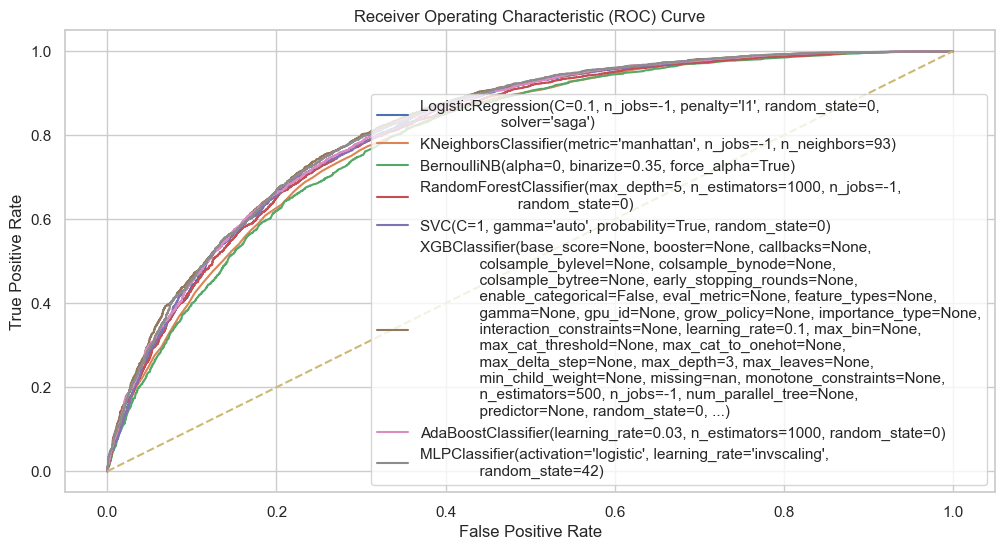

In [ ]:
# Una vez obtenido el resultado, se grafica la curva roc para el 10% restante.
# Crear figura de tamaño 12x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelLR,modelknn,modelBNB,modelRanForest,modelSVC,modelXGBC,modelADBC, modelMPC]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test_final)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test_final, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test_final, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

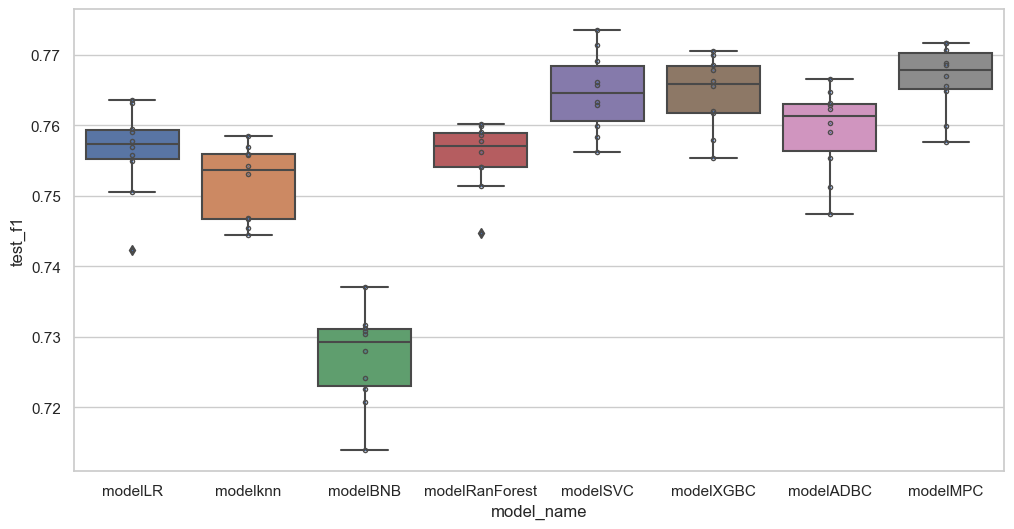

In [ ]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [ ]:
y_SVC = modelSVC.predict(X_test_final)

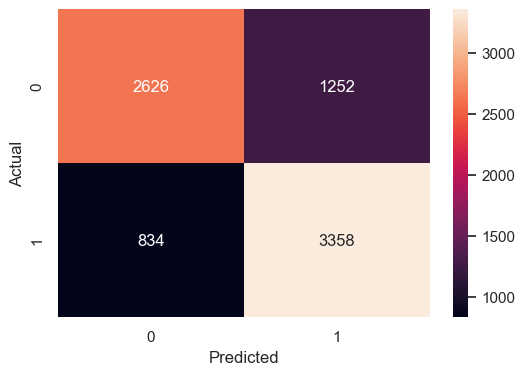

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      3878
         1.0       0.73      0.80      0.76      4192

    accuracy                           0.74      8070
   macro avg       0.74      0.74      0.74      8070
weighted avg       0.74      0.74      0.74      8070



In [ ]:
# y_pred = y_ComplNB

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test_final, y_SVC)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test_final, y_SVC))